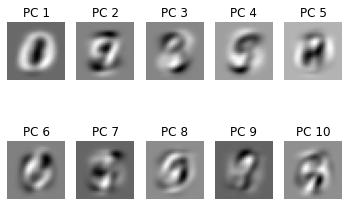

Explained variance:
[0.09746116 0.07155445 0.06149531 0.05403385 0.04888934 0.04305227
 0.03278262 0.02889642 0.02758364 0.0234214 ]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

# Load the MNIST dataset
mnist = fetch_openml('mnist_784')
X = mnist.data.values
y = mnist.target.astype(np.uint8)

# Flatten the images
X = X.reshape(X.shape[0], -1)
n = len(X[0])

# Compute the mean
mean = np.mean(X, axis=0)

# Center the data
X_centered = X - mean

# Compute the covariance matrix
#covariance_matrix = np.cov(X_centered.T)
C = (np.transpose(X_centered)@X_centered)/(n)

# Compute the eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(C)

# Sort the eigenvectors by eigenvalue in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Project the data onto the principal components
k = 10 # number of principal components to keep
X_pca = X_centered.dot(eigenvectors[:, :k])

# Visualize the principal components
for i in range(k):
    plt.subplot(2, 5, i+1)
    plt.imshow(eigenvectors[:, i].real.reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.title(f'PC {i+1}')
plt.show()

# Compute the variance explained by each principal component
total_variance = np.sum(eigenvalues)
explained_variance = eigenvalues[:k] / total_variance
print(f'Explained variance:\n{explained_variance}')
